# Load Kedro

In [422]:
%reload_ext kedro.ipython

[10/15/25 22:57:35] INFO     Registered line magic '%reload_kedro'                                   ]8;id=418736;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=171160;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=758275;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=857310;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=194873;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=578681;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /Users/eoinmolloy/Documents/Documents/FPL-Modelling/fpl-modelling.                    
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=906218;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=832748;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/15/25 22:57:36] INFO     Kedro project fpl_modelling                                            ]8;id=677918;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=549295;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=991009;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=195963;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

# Imports

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load data

In [417]:
p_hist.columns


Index(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'modified',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'clearances_blocks_interceptions', 'recoveries',
       'tackles', 'defensive_contribution', 'starts', 'expected_goals',
       'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'value', 'transfers_balance', 'selected',
       'transfers_in', 'transfers_out', 'player_name', 'team_id',
       'position_id'],
      dtype='object')

In [415]:
p_hist = catalog.load("players_hist")

[10/15/25 22:41:30] INFO     Loading data from players_hist (SQLTableDataset)...               ]8;id=959924;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=106432;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

In [385]:
all_df = catalog.load("players_hist_merged")
all_df.head()

                    INFO     Loading data from players_hist_merged (SQLQueryDataset)...        ]8;id=171647;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=571860;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

,player_id,web_name,first_name,second_name,player_name,team_id,players_team,opponent_team_id,opponent_team,was_home,...,total_minutes,total_points,total_transfers_in,total_transfers_out,position_id,position_name,position_name_abbr,cumsum_minutes,cumsum_points,cumsum_ict_index
0,1,Raya,David,Raya Martín,David Raya Martín,1,Arsenal,14,Man Utd,0,...,630,34,1456575,649158,1,Goalkeeper,GKP,90,10,4.9
1,1,Raya,David,Raya Martín,David Raya Martín,1,Arsenal,11,Leeds,1,...,630,34,1456575,649158,1,Goalkeeper,GKP,180,16,6.2
2,1,Raya,David,Raya Martín,David Raya Martín,1,Arsenal,12,Liverpool,0,...,630,34,1456575,649158,1,Goalkeeper,GKP,270,18,9.2
3,1,Raya,David,Raya Martín,David Raya Martín,1,Arsenal,16,Nott'm Forest,1,...,630,34,1456575,649158,1,Goalkeeper,GKP,360,24,10.5
4,1,Raya,David,Raya Martín,David Raya Martín,1,Arsenal,13,Man City,1,...,630,34,1456575,649158,1,Goalkeeper,GKP,450,26,12.6


Data Transformations at start

In [386]:
# Shift round points as we need to predict next round using previous round to avoid data leakage
shift_to_next_week_cols = [
    'round_points',
    'opponent_team',
    'was_home'
]
for shift_to_next_week_col in shift_to_next_week_cols:

    all_df[f"next_week_{shift_to_next_week_col}"] = all_df.groupby('player_id')[shift_to_next_week_col].shift(-1)

all_df['accumulated_minutes'] = all_df.groupby('player_id')['round_minutes'].cumsum()

# all_df['fixture_difficulty'] = np.where(
#     all_df['was_home'] == 1,
#     all_df['players_team_strength_home'] - all_df['opponent_team_strength_away'],
#     all_df['players_team_strength_away'] - all_df['opponent_team_strength_home']
# )

# next_gw_cols = [
#     'players_team_strength',
#     'players_team_strength_home',
#     'players_team_strength_away',
#     'opponent_team_strength',
#     'opponent_team_strength_home',
#     'opponent_team_strength_away',
#     'fixture_difficulty'
# ]

# shift them -1 within each player to align next GW features with current GW
# for col in next_gw_cols:
#     all_df[f'next_{col}'] = all_df.groupby('player_id')[col].shift(-1)


# EDA

##  Play time of Players

Get dataframe of unique players

In [387]:
p_unique_df_all = all_df.drop_duplicates(subset='player_id', keep='last')

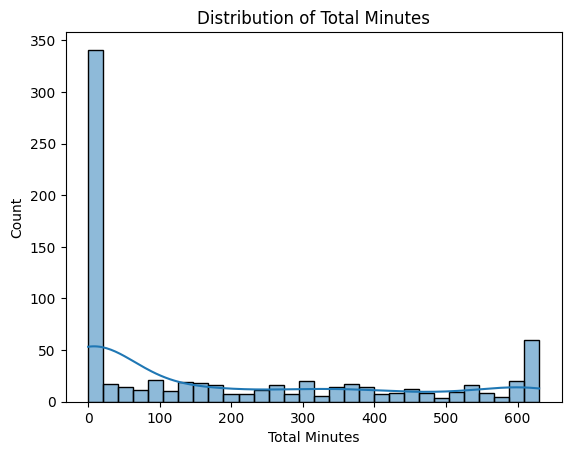

In [388]:


sns.histplot(p_unique_df_all['total_minutes'], bins=30, kde=True)
plt.title('Distribution of Total Minutes')
plt.xlabel('Total Minutes')
plt.ylabel('Count')
plt.show()


Most players havent played any minute giving a right skewed distribution, and there is a spike around 600 minutes for players who have played in most games

### Remove any player who hasnt played a game

In [389]:
num_all_players = all_df['player_id'].nunique()
num_players_no_mins = all_df.loc[all_df['total_minutes'] > 0, 'player_id'].nunique()
print(f'Removing {num_players_no_mins} from {num_all_players} total players leaving {num_all_players-num_players_no_mins} players left')
df = all_df[all_df['total_minutes']>0]

model_df = all_df.dropna(subset='next_week_round_points')



Removing 429 from 743 total players leaving 314 players left


In [390]:
p_unique_df = df.drop_duplicates(subset='player_id', keep='last')

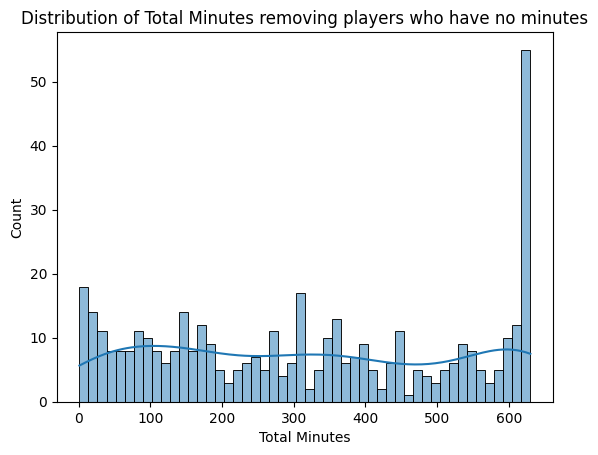

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(p_unique_df['total_minutes'], bins=50, kde=True)
plt.title('Distribution of Total Minutes removing players who have no minutes')
plt.xlabel('Total Minutes')
plt.ylabel('Count')
plt.show()


Now we see the more prominent spike of players who have played most minutes in games giving a left skewed distribution

## Target Variable Univariate Analysis: Total Points

### Distribution

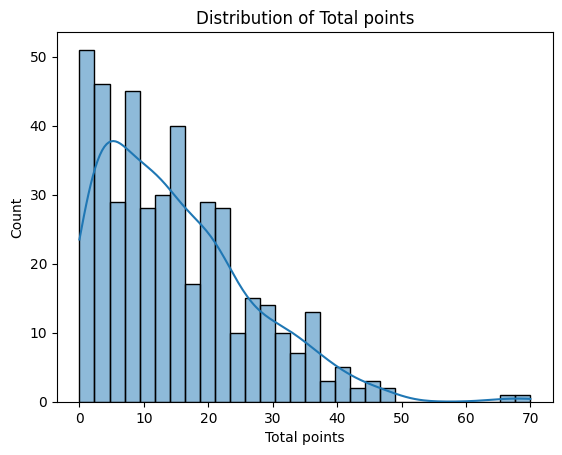

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(p_unique_df['total_points'], bins=30, kde=True)
plt.title('Distribution of Total points')
plt.xlabel('Total points')
plt.ylabel('Count')
plt.show()


- Total points is also a right skewed distribution with most players not having many points
- we can try a log transformation to see if this will result in a normal distribution

[10/15/25 22:10:19] WARNING  /var/folders/5g/y4dx7m714l7ft2p__s3ybpn80000gn/T/ipykernel_97657/10166 ]8;id=187854;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=362499;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             03022.py:1: SettingWithCopyWarning:                                                   
                                                                                                                   
                                                                                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                                                                                                                   
                                                                                                                   

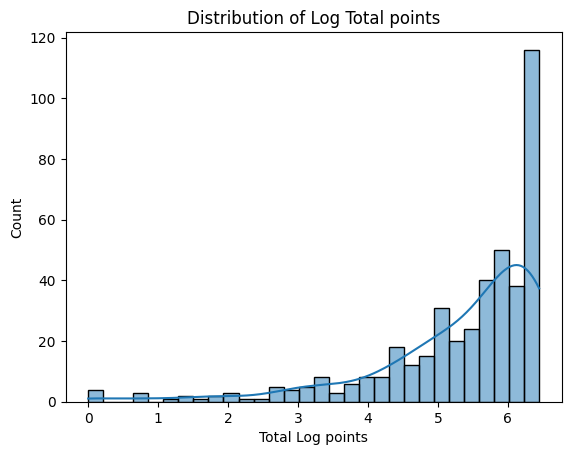

In [393]:
p_unique_df['log_total_minutes'] = np.log(p_unique_df['total_minutes'])

sns.histplot(p_unique_df['log_total_minutes'], bins=30, kde=True)
plt.title('Distribution of Log Total points')
plt.xlabel('Total Log points')
plt.ylabel('Count')
plt.show()


A log transformation actually gives a left skewed distribution instead so it may not be too useful

[10/15/25 22:10:20] WARNING  /var/folders/5g/y4dx7m714l7ft2p__s3ybpn80000gn/T/ipykernel_97657/19536 ]8;id=875543;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=19470;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             93017.py:4: SettingWithCopyWarning:                                                   
                                                                                                                   
                                                                                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc = value instead                                                        
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                                                                                                                   
                                                                                                                   

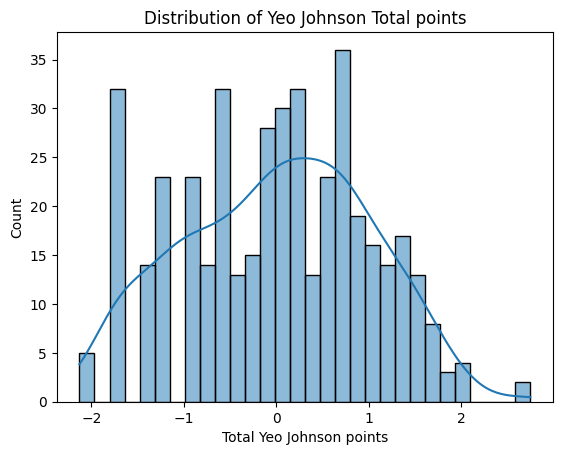

In [394]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
p_unique_df['yj_total_minutes'] = pt.fit_transform(p_unique_df[['total_points']])

sns.histplot(p_unique_df['yj_total_minutes'], bins=30, kde=True)
plt.title('Distribution of Yeo Johnson Total points')
plt.xlabel('Total Yeo Johnson points')
plt.ylabel('Count')
plt.show()

### Outliers

In [395]:
import plotly.express as px

def plot_box_with_hover(df, col, id_col='player_id'):
    fig = px.box(
        df,
        y=col,
        points="outliers",               # show only outliers
        hover_data=[id_col]              # show player_id on hover
    )
    fig.update_layout(
        title=f"Boxplot of {col} with Outliers Hover Info",
        yaxis_title=col,
        xaxis_title=""
    )
    fig.show()


In [396]:
p_unique_df['player_name']


6                  David Raya Martín
34      Gabriel dos Santos Magalhães
41                    William Saliba
48                Riccardo Calafiori
55                    Jurriën Timber
                    ...             
5034                Christantus Uche
5038                   Senne Lammens
5042                    Dilane Bakwa
5046                 Bertrand Traoré
5050            Gianluigi Donnarumma
Name: player_name, Length: 429, dtype: object

In [397]:
plot_box_with_hover(p_unique_df, col='total_points', id_col='player_name')


## Bivariate Analysis of Round Points

### Numerical Features

#### Correlation Matrix

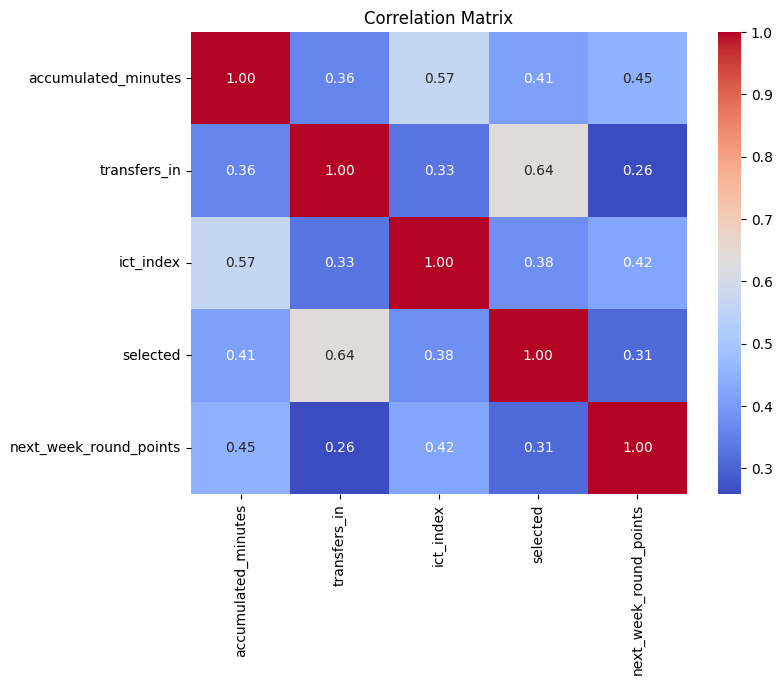

In [399]:
numerical_feature_cols = [
    'accumulated_minutes',
    'transfers_in',
    'ict_index',
    'selected'
]
target_col = 'next_week_round_points'

# Select relevant columns
corr_df = model_df[numerical_feature_cols + [target_col]]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


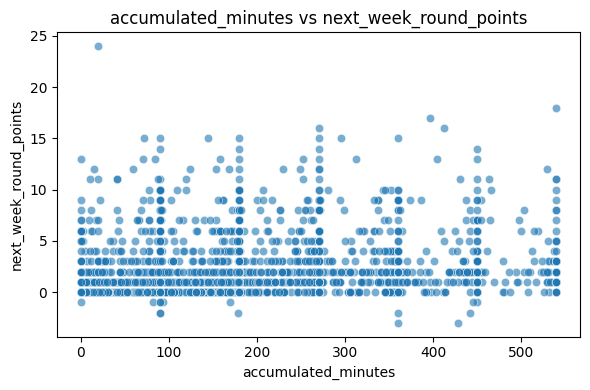

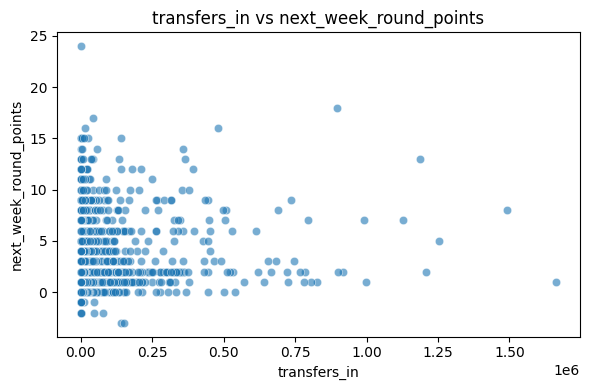

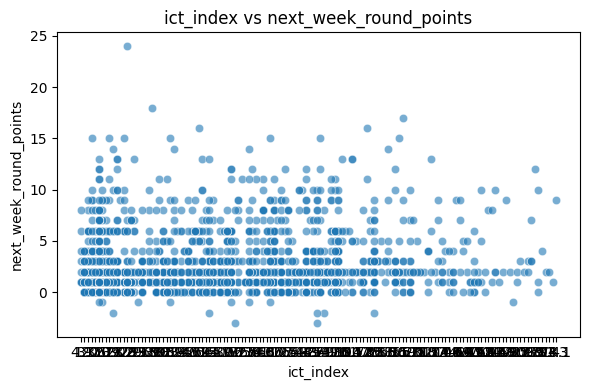

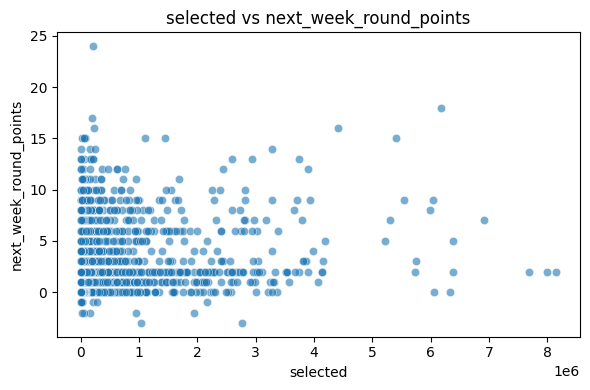

In [400]:
for feature in numerical_feature_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y=target_col, data=model_df, alpha=0.6)
    plt.title(f"{feature} vs {target_col}")
    plt.xlabel(feature)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()

### Categorial Features

In [401]:
categorical_feature_cols = [
    'next_week_was_home',
    'players_team',
    'next_week_opponent_team',
    'position_name',
]
target_col = 'next_week_round_points'


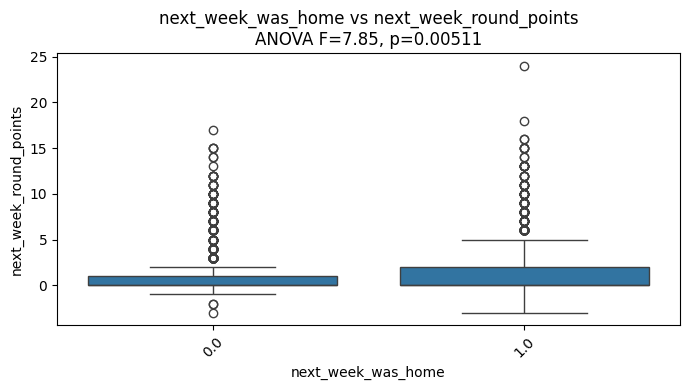

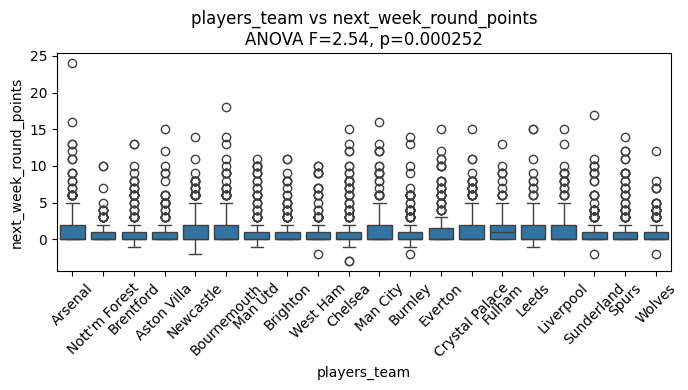

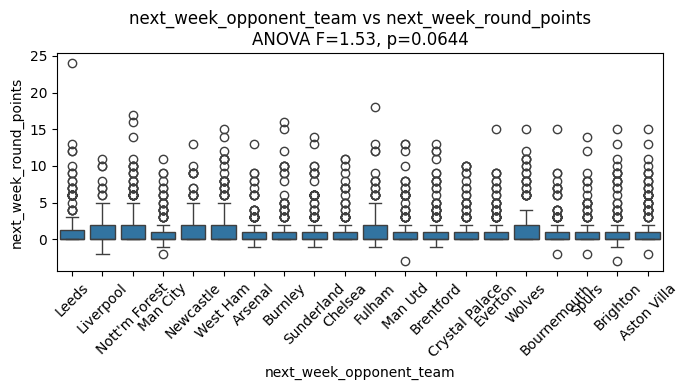

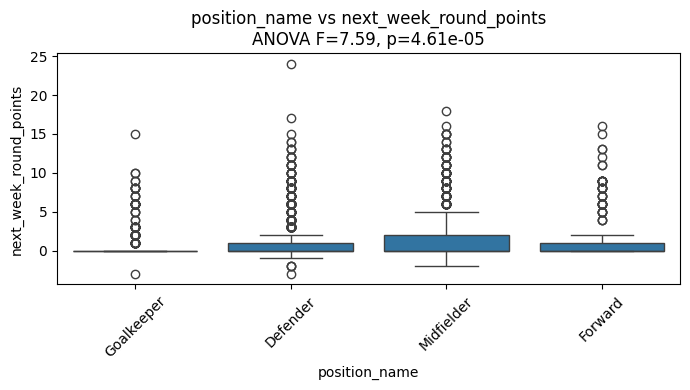

,feature,F_value,p_value
0,next_week_was_home,7.847887,0.005111
3,position_name,7.593823,0.000046
1,players_team,2.538545,0.000252
2,next_week_opponent_team,1.533698,0.064437


In [402]:
anova_results = []

for col in categorical_feature_cols:
    # --- ANOVA test ---
    groups = [model_df[model_df[col] == cat][target_col] for cat in model_df[col].unique()]
    f_val, p_val = f_oneway(*groups)
    anova_results.append({'feature': col, 'F_value': f_val, 'p_value': p_val})

    # --- Boxplot ---
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=col, y=target_col, data=model_df)
    plt.title(f"{col} vs {target_col}\nANOVA F={f_val:.2f}, p={p_val:.3g}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

anova_df = pd.DataFrame(anova_results).sort_values('F_value', ascending=False)
anova_df

All features except next week opponent team prove statistically singificant difference at > 99% confidence while next week opponent team proves at >90% confidence

# Modelling

## Prepare Train and Test Dataframes

In [403]:
print(f'We have up to gameweek {model_df['round'].max()+1} available which means we can use up to gameweek {model_df['round'].max()-2} for modelling')

We have up to gameweek 7 available which means we can use up to gameweek 4 for modelling


In [407]:
def prepare_df_at_gameweek(current_gameweek, arg_df, num_forecasted_games=1, 
                           target_col='next_week_round_points', num_test_gameweeks=1):
    """
    Build a dataset for a given gameweek, using features from each past gameweek to predict
    total points over the next `num_forecasted_games` gameweeks.

    The most recent `num_test_gameweeks` will be returned as test set, rest as training set.

    Returns:
        train_df, test_df
    """

    max_gw_in_data = arg_df['round'].max()+1

    # --- Sanity checks ---
    if current_gameweek > max_gw_in_data:
        raise ValueError(f"current_gameweek={current_gameweek} is beyond max round in data ({max_gw_in_data}).")

    if current_gameweek + num_forecasted_games > max_gw_in_data:
        raise ValueError(
            f"Not enough future gameweeks after GW{current_gameweek} "
            f"to forecast {num_forecasted_games} games. "
            f"Max available GW is {max_gw_in_data}."
        )

    Xs = []

    # Go backwards from current_gameweek down to 1
    for gw in range(current_gameweek, 0, -1):
        curr_X = arg_df[arg_df['round'] == gw].copy()

        # Define next gameweeks to sum for target
        next_weeks = list(range(gw + 1, gw + 1 + num_forecasted_games))

        # Stop early if any next week exceeds available rounds
        if any(nw > max_gw_in_data for nw in next_weeks):
            continue  # skip gameweeks without full future info

        target_data = arg_df[arg_df['round'].isin(next_weeks)][['player_id', target_col]]

        # Sum future points per player
        curr_y = target_data.groupby('player_id')[target_col].sum().reset_index(name='target')

        # Merge features and target
        merged = pd.merge(curr_X, curr_y, on='player_id', how='inner')
        merged['source_gw'] = gw
        Xs.append(merged)

    if not Xs:
        raise ValueError(
            f"No valid gameweeks to process for current_gameweek={current_gameweek} "
            f"and num_forecasted_games={num_forecasted_games}. Try reducing num_forecasted_games."
        )

    # Combine all GWs
    df_all = pd.concat(Xs, ignore_index=True)

    # Split into train/test
    max_gw = df_all['source_gw'].max()
    test_gws = list(range(max_gw, max_gw - num_test_gameweeks, -1))

    test_df = df_all[df_all['source_gw'].isin(test_gws)].reset_index(drop=True)
    train_df = df_all[~df_all['source_gw'].isin(test_gws)].reset_index(drop=True)

    # Return None if no training data
    if train_df.empty:
        train_df = None

    return train_df, test_df


In [410]:
train_df, test_df = prepare_df_at_gameweek(current_gameweek=6, arg_df=model_df)
                       

# Model Selection and Evaluation

In [411]:
features = numerical_feature_cols+categorical_feature_cols

## Walk Forward Cross Validation

In [412]:
def train_test_split(train_df, test_df, features, target):

    return train_df[features], train_df[target_col], test_df[features], test_df[target_col]

In [414]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import ElasticNet, PoissonRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from skopt import BayesSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import numpy as np
import pandas as pd
from skopt.space import Real, Integer, Categorical

# FEATURES

all_features = numerical_feature_cols + categorical_feature_cols

# COLUMN TRANSFORMER
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numerical_feature_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_feature_cols)
    ]
)

# MODELS AND PARAM SPACES
models = {
    "ElasticNet": {
        "model": ElasticNet(),
        "param_space": {
            "model__alpha": (0.01, 10.0, "log-uniform"),
            "model__l1_ratio": (0.0, 1.0)
        },
        "scale": True
    },
    "Ridge": {
        "model": Ridge(),
        "param_space": {"model__alpha": (0.01, 10.0, "log-uniform")},
        "scale": True
    },

    "KNN": {
        "model": KNeighborsRegressor(),
        "param_space": {"model__n_neighbors": (2, 20)},
        "scale": True
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor(random_state=42),
        "param_space": {"model__n_estimators": (50, 300), "model__max_depth": (3, 15)},
        "scale": False
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(random_state=42),
        "param_space": {
    "model__n_estimators": Integer(50, 1000),
    "model__max_depth": Integer(2, 15),
    "model__learning_rate": Real(1e-3, 0.5, prior="log-uniform"),
    "model__min_samples_split": Integer(2, 50),
    "model__min_samples_leaf": Integer(1, 50),
    "model__subsample": Real(0.5, 1.0),
    "model__max_features": Categorical(["sqrt", "log2", None]),
    "model__loss": Categorical(["squared_error", "huber", "absolute_error"]),
    "model__alpha": Real(0.7, 0.99)
},
        "scale": False
    },
    "XGBRegressor": {
        "model": XGBRegressor(objective='reg:squarederror', random_state=42),
        "param_space": {
    "model__n_estimators": Integer(50, 2000),
    "model__max_depth": Integer(2, 15),
    "model__learning_rate": Real(5e-4, 0.5, prior="log-uniform"),
    "model__subsample": Real(0.4, 1.0),
    "model__colsample_bytree": Real(0.4, 1.0),
    "model__colsample_bylevel": Real(0.4, 1.0),
    "model__reg_alpha": Real(1e-8, 100.0, prior="log-uniform"),
    "model__reg_lambda": Real(1e-8, 100.0, prior="log-uniform"),
    "model__min_child_weight": Integer(1, 20),
    "model__gamma": Real(0.0, 10.0),
    "model__booster": Categorical(["gbtree"])
},
        "scale": False
    },
    "LGBMRegressor": {
        "model": LGBMRegressor(random_state=42),
        "param_space": {"model__n_estimators": (50, 300), "model__max_depth": (3, 15), "model__learning_rate": (0.01, 0.3, "log-uniform")},
        "scale": False
    },
    "CatBoostRegressor": {
        "model": CatBoostRegressor(random_state=42, verbose=0),
        "param_space": {"model__iterations": (50, 300), "model__depth": (3, 10), "model__learning_rate": (0.01, 0.3, "log-uniform")},
        "scale": False
    }
}

# STORAGE FOR RESULTS
results = []

# NAIVE BASELINE: predict mean target from training set
def naive_baseline(y_train, y_test):
    pred = np.full_like(y_test, y_train.mean(), dtype=float)
    return {
        "test_r2": r2_score(y_test, pred),
        "test_mae": mean_absolute_error(y_test, pred),
        "test_rmse": root_mean_squared_error(y_test, pred),
        "test_mape": np.mean(np.abs((y_test - pred)/y_test))*100
    }

# LOOP THROUGH GAMEWEEKS AND MODELS
for gw in range(2, 5):  # example gameweeks
    train_df, test_df = prepare_df_at_gameweek(current_gameweek=gw, arg_df=model_df)
    
    X_train = train_df[all_features]
    y_train = train_df['target']
    X_test = test_df[all_features]
    y_test = test_df['target']
    
    # Add naive baseline first
    naive_metrics = naive_baseline(y_train, y_test)
    naive_metrics.update({"model": "NaiveMean", "gameweek": gw, "best_params": None})
    results.append(naive_metrics)
    
    for model_name, mp in models.items():
        # PIPELINE
        if mp["scale"]:
            pipeline = Pipeline([("preprocessor", preprocessor), ("model", mp["model"])])
        else:
            preproc_no_scale = ColumnTransformer(
                transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_feature_cols)],
                remainder="passthrough"
            )
            pipeline = Pipeline([("preprocessor", preproc_no_scale), ("model", mp["model"])])
        
        # TIME SERIES SPLIT
        tscv = TimeSeriesSplit(n_splits=max(2, gw-1))
        
        # BAYESIAN OPTIMIZATION
        opt = BayesSearchCV(
            estimator=pipeline,
            search_spaces=mp["param_space"],
            cv=tscv,
            n_iter=30,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        
        opt.fit(X_train, y_train)
        y_pred_test = opt.best_estimator_.predict(X_test)
        
        results.append({
            "model": model_name,
            "gameweek": gw,
            "best_params": opt.best_params_,
            "test_r2": r2_score(y_test, y_pred_test),
            "test_rmse": root_mean_squared_error(y_test, y_pred_test),
            "test_mae": mean_absolute_error(y_test, y_pred_test),
            "test_mape": np.mean(np.abs((y_test - y_pred_test)/y_test))*100
        })

# CONVERT RESULTS TO DATAFRAME
results_df = pd.DataFrame(results)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.017e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.772e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.182e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.610e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.930e+02, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.936e+02, tolerance: 1.058e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+03, tolerance: 2.940e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

[10/15/25 22:11:51] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=164714;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=556317;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:11:52] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=788613;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=674017;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=113801;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=317347;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=563585;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=786694;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=835978;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=665204;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:11:53] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=198318;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=220468;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=543435;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=891441;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=157340;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=648601;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=70494;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=454988;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:11:54] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=456937;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=693866;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=121457;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=939622;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:12:00] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=86764;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=559424;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=589312;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=575602;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:12:01] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=731943;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=200359;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:12:02] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=290689;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=373302;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=387993;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=284660;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:12:03] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=549553;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=19416;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=446817;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=412475;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:12:04] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=221198;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=866986;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:12:05] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=237676;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=49679;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 37
[LightGBM] [Info] Start training from score 1.343478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 21
[LightGBM] [Info] Start training from score 1.095652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 690, number of used features: 49
[LightGBM] [Info] Start training from score 1.326087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[10/15/25 22:13:06] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=343499;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=666395;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.293e+02, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.999e+02, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.899e+02, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+03, tolerance: 2.903e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+03, tolerance: 5.167e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:28] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=603453;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=527475;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.5607018124300137]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:29] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=430878;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=336038;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.09492748798592221]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=639532;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=2237;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.036741441504281776]                                                          
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=771519;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=756174;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [4.551087824950215]                                                             
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=335681;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=922475;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.4102234151076511]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=289204;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=958830;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [7.5664944212832355]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:30] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=841759;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=702870;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.21628887669382754]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=596653;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=904646;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.18940374900549087]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=78747;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=952801;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [3.808733547462147]                                                             
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:31] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=563835;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=855066;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.03156275842049796]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=856798;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=820544;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.05134917424386879]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=184600;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=41316;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.01513903577740572]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=569970;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=565030;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.0689823526251927]                                                            
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:32] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=244;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=227561;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.023839605231744873]                                                          
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=325105;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=133427;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.014371127463664117]                                                          
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=730388;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=342504;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.05601691627860943]                                                           
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=525443;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=446008;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.805840506675025]                                                             
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

[10/15/25 22:13:36] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=692406;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=968361;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=430717;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=916982;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=416735;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=180881;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:37] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=690524;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=405953;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=586943;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=813097;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=923678;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=233552;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:38] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=841308;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=317449;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=651067;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=521041;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=87529;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=950356;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=867894;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=118649;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:39] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=103852;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=757809;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

[10/15/25 22:13:48] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=813246;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=30909;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=974265;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=536210;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:49] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=699844;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=410943;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:50] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=290604;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=243300;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:51] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=594945;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=525317;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:53] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=728795;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=327370;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=479285;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=17254;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[10/15/25 22:13:54] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=526952;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=433602;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number o

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 930, number of used features: 50
[LightGBM] [Info] Start training from score 1.251613
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 465, number of used features: 38
[LightGBM] [Info] Start training from score 1.378495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 1395, number of used features: 50
[LightGBM] [Info] Start training from score 1.323297
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[10/15/25 22:15:19] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=677558;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=194615;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.705e+02, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.206e+02, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+03, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.080e+03, tolerance: 2.645e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.252e+03, tolerance: 5.667e-01
Linear regression models with a zero l1 penalization strength are more

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

[10/15/25 22:15:43] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=631419;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=926839;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.023839605231744873]                                                          
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=134925;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=782844;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.014371127463664117]                                                          
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=764303;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=932379;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.30137247015962443]                                                           
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/15/25 22:15:44] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=53980;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=770222;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.805840506675025]                                                             
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=424444;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=106557;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [2.6405104663722323]                                                            
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=960369;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=727423;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point [10.0] before, using random                 
                             point [0.14477461020783564]                                                           
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/15/25 22:15:46] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=279056;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=305698;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/15/25 22:15:48] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=830192;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=89951;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=207798;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=403005;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=891841;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=496241;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/15/25 22:15:49] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=304922;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=666813;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=753621;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=729482;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=862034;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=703230;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=600127;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=32453;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/15/25 22:15:50] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=901539;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=756975;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


                    WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=29639;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=593248;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[10/15/25 22:15:51] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=663593;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=628360;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning:                       
                                                                                                                   
                             The objective has been evaluated at point  before, using random point                 
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [In

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-w

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, num

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-w

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Warning] No further splits with 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further split

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-w

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Info] Start training from score 1.218849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number o

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can 

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 50
[LightGBM] [Info] Start training from score 1.226540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 529, number of used features: 42
[LightGBM] [Info] Start training from score 1.172023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1581, number of used features: 50
[LightGBM] [Inf

/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 2107, number of used features: 50
[LightGBM] [Info] Start training from score 1.265781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[10/15/25 22:18:08] WARNING  /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3. ]8;id=26696;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=513507;file:///opt/homebrew/Cellar/python@3.12/3.12.11_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/warnings.py#112\112]8;;\
                             12/site-packages/sklearn/utils/validation.py:2749: UserWarning:                       
                                                                                                                   
                             X does not have valid feature names, but LGBMRegressor was fitted with                
                             feature names                                                                         
                                                                                                                   
                                                                                                                   

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
results_df.sort_values(by=['gameweek', 'test_rmse'])

,test_r2,test_mae,test_rmse,test_mape,model,gameweek,best_params
2,0.525949,2.410689,3.752106,inf,XGBRegressor,2,"{'model__booster': 'gbtree', 'model__colsample..."
1,0.465606,2.349725,3.983761,inf,GradientBoostingRegressor,2,"{'model__alpha': 0.99, 'model__learning_rate':..."
0,-0.001053,4.251859,5.452444,inf,NaiveMean,2,None
5,0.525420,2.313592,3.587422,inf,XGBRegressor,3,"{'model__booster': 'gbtree', 'model__colsample..."
4,0.523971,2.376865,3.592894,inf,GradientBoostingRegressor,3,"{'model__alpha': 0.99, 'model__learning_rate':..."
3,-0.001477,4.106679,5.211324,inf,NaiveMean,3,None
8,0.329036,2.014922,3.119888,inf,XGBRegressor,4,"{'model__booster': 'gbtree', 'model__colsample..."
7,0.281606,2.054040,3.228277,inf,GradientBoostingRegressor,4,"{'model__alpha': 0.9037661351764323, 'model__l..."
6,-0.113783,3.351293,4.019664,inf,NaiveMean,4,None


In [ ]:
results_df[results_df['gameweek']==4].sort_values(by='test_rmse').iloc[0]['best_params']

OrderedDict({'model__booster': 'gbtree', 'model__colsample_bylevel': 0.8203728667728196, 'model__colsample_bytree': 0.922991157077929, 'model__gamma': 4.158210875794536, 'model__learning_rate': 0.006952873032336879, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 773, 'model__reg_alpha': 0.008785958264239105, 'model__reg_lambda': 5.742011472489027e-07, 'model__subsample': 0.8604270021819085})

In [ ]:
p = catalog.load("players")
p['ict_index'] = pd.to_numeric(p['ict_index'], errors='coerce')
all_df['ict_index'] = pd.to_numeric(all_df['ict_index'], errors='coerce')

[10/14/25 21:50:48] INFO     Loading data from players (SQLTableDataset)...                    ]8;id=327462;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=904381;file:///Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/kedro/io/data_catalog.py#1046\1046]8;;\

In [ ]:
numerical_feature_cols

['accumulated_minutes', 'transfers_in', 'ict_index', 'selected_by_percent']

In [ ]:
all_df[all_df['player_name']=='Erling Haaland'][['round', 'round_minutes']]#['selected_by_percent'].sum()

,round,round_minutes
3252,1,72
3253,2,90
3254,3,90
3255,4,86
3256,5,75
3257,6,90
3258,7,90


In [ ]:
all_df['sel']

In [ ]:
p[p['player_name']=='Erling Haaland'][['selected']]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 p[p['player_name']=='Erling Haaland'][['selected']]                                          │
│   2                                                                                              │
│                                                                                                  │
│ /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/pandas/co │
│ re/frame.py:4113 in __getitem__                                                                  │
│                                                                                                  │
│    4110 │   │   else:                                                                            │
│    4111 │   │   │   if is_iterator(key):                                                         │
│    4112 │   │   │   │   key = list(key)                                                          │
│ ❱  4113 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    4114 │   │                                                                                    │
│    4115 │   │   # take() does not accept boolean indexers                                        │
│    4116 │   │   if getattr(indexer, "dtype", None) == bool:                                      │
│                                                                                                  │
│ /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/pandas/co │
│ re/indexes/base.py:6212 in _get_indexer_strict                                                   │
│                                                                                                  │
│   6209 │   │   else:                                                                             │
│   6210 │   │   │   keyarr, indexer, new_indexer = self._reindex_non_unique(keyarr)               │
│   6211 │   │                                                                                     │
│ ❱ 6212 │   │   self._raise_if_missing(keyarr, indexer, axis_name)                                │
│   6213 │   │                                                                                     │
│   6214 │   │   keyarr = self.take(indexer)                                                       │
│   6215 │   │   if isinstance(key, Index):                                                        │
│                                                                                                  │
│ /Users/eoinmolloy/Documents/Documents/FPL-Modelling/.venv/lib/python3.12/site-packages/pandas/co │
│ re/indexes/base.py:6261 in _raise_if_missing                                                     │
│                                                                                                  │
│   6258 │   │                                                                                     │
│   6259 │   │   if nmissing:                                                                      │
│   6260 │   │   │   if nmissing == len(indexer):                                                  │
│ ❱ 6261 │   │   │   │   raise KeyError(f"None of [{key}] are in the [{axis_name}]")               │
│   6262 │   │   │                                                                                 │
│   6263 │   │   │   not_found = list(ensure_index(key)[missing_mask.nonzero()[0]].unique())       │
│   6264 │   │   │   raise KeyError(f"{not_found} not in index")                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: "None of [Index(['selected'], dtype='object')] are 

In [ ]:
p.sort_values(by='ict_index', ascending=False)[['player_name', 'ict_index']][0:50]

,player_name,ict_index
player_id,,
430,Erling Haaland,76.8
82,Antoine Semenyo,65.0
419,Jack Grealish,64.5
449,Bruno Borges Fernandes,59.7
582,Mohammed Kudus,55.5
119,Bryan Mbeumo,53.8
384,Cody Gakpo,52.6
8,Jurriën Timber,49.8
160,Yankuba Minteh,49.6


## Regular Train Test Split

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge

train_df, test_df = prepare_df_at_gameweek(current_gameweek=3, arg_df=model_df)

features = numerical_feature_cols + categorical_feature_cols

X_train, y_train = train_df[features], train_df[target_col]
X_test, y_test = test_df[features], test_df[target_col]

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_feature_cols),
        # ('num', StandardScaler(), numerical_feature_cols)
    ],
    remainder='passthrough'  # keep numerical columns as is
)

# Random Forest pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(**{'learning_rate': 0.29999999999999993, 'max_depth': 3, 'n_estimators': 50}))
])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluation metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true).replace([float('inf'), -float('inf')], 0).mean()) * 100

metrics = {
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': root_mean_squared_error(y_train, y_train_pred),
    'Test RMSE': root_mean_squared_error(y_test, y_test_pred),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred),
    'Train MAPE': mean_absolute_percentage_error(y_train, y_train_pred),
    'Test MAPE': mean_absolute_percentage_error(y_test, y_test_pred)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


Train MAE: 0.6982
Test MAE: 1.2623
Train RMSE: 1.2196
Test RMSE: 2.2011
Train R2: 0.7648
Test R2: 0.1932
Train MAPE: 20.1378
Test MAPE: 33.3970


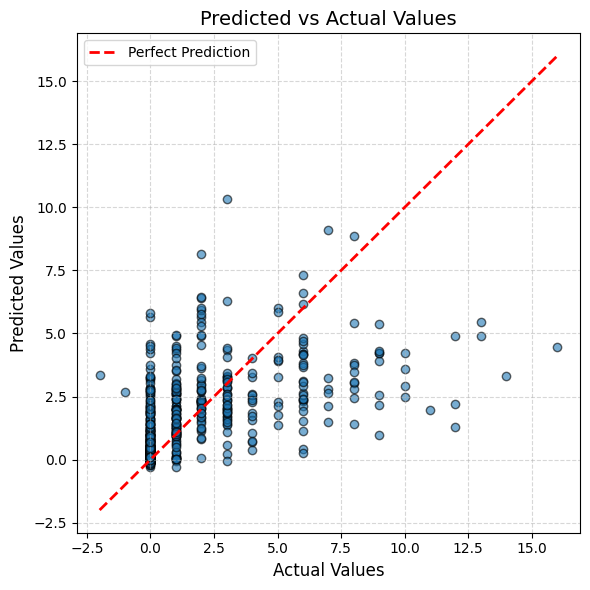

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k')

# Labels and formatting
plt.title("Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)

# Reference line (perfect predictions)
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, 'r--', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
test_df['target'].mean()

np.float64(3.4887640449438204)

In [ ]:
results_df.sort_values(by=['gameweek', 'test_rmse'])

,model,gameweek,best_params,test_r2,test_rmse,test_mae,test_mape
18,GradientBoostingRegressor,2,"{'model__learning_rate': 0.01597774786435076, ...",0.520020,3.775499,2.498285,inf
21,XGBRegressor,2,"{'model__learning_rate': 0.016962221594166126,...",0.516104,3.790866,2.478205,inf
15,RandomForestRegressor,2,"{'model__max_depth': 3, 'model__n_estimators':...",0.512819,3.803713,2.510934,inf
27,CatBoostRegressor,2,"{'model__depth': 3, 'model__iterations': 241, ...",0.497553,3.862850,2.564826,inf
24,LGBMRegressor,2,"{'model__learning_rate': 0.045401641878176635,...",0.465591,3.983820,2.557502,inf
12,KNN,2,{'model__n_neighbors': 7},0.449020,4.045114,2.570618,inf
6,Lasso,2,{'model__alpha': 0.10625459084029841},0.174540,4.951201,3.456125,inf
0,ElasticNet,2,"{'model__alpha': 0.10481315701873967, 'model__...",0.173553,4.954160,3.457107,inf
3,Ridge,2,{'model__alpha': 8.565925757139402},0.156211,5.005870,3.458413,inf
9,SVR,2,"{'model__C': 15.925169151603527, 'model__epsil...",-1.340753,8.337588,7.365818,inf


In [ ]:
min_rmse_rows = results_df.loc[results_df.groupby('gameweek')['test_rmse'].idxmin()]
min_rmse_rows['best_params'].iloc[-3]

OrderedDict({'model__learning_rate': 0.01597774786435076, 'model__max_depth': 3, 'model__n_estimators': 228})